# <font color='blue'>**Machine Learning Project**</h2>

**Authors** :

 -**REZGUI Houssem**


<style>
    h1{
        text-align: center;
        font-weight: bold;
        background-color: #29BDC1;
        color: white;
        border-radius: 5px;
    }
</style>

<h1>Seoul bike sharing</h1>
<p>
    This dataset contains count of public bikes rented at each hour in Seoul Bike sharing System with the corresponding Weather data and Holidays information. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
</p>
<p>
    The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. <br>
</p>
<p>
    It is available on <a href="https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand">UCI Machine Learning Repository</a>.
</p>
<p>
    <b>The objective with this dataset is to predict the number of bikes rented at each hour of the day using the other columns so that the city can provide a stable supply of rental bikes.</b>
</p>

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2>Outline</h2>

<ol>
    <li><a href="#1">Importing libraries and data</a></li>
    <li>
        <a href="#2">Data Manipulation</a>
        <ul>
            <li><a href="#2a">Loading the dataset</a></li>
            <li><a href="#2b">Understanding the data</a></li>
            <li><a href="#2c">Preprocessing the data</a></li>
            <ul>
                <li><a href="#2c1">Null Values</a></li>
                <li><a href="#2c2">Unique Values</a></li>
                <li><a href="#2c3">Duplicated Values</a></li>
                <li><a href="#2c4">Outliers</a></li>
            </ul>
        </ul>
    </li>
    <li>
        <a href="#3">Feature Extraction</a>
        <ul>
            <li><a href="#3a">Look at the number of bike rented for functional days and non functional days</a></li>
            <li><a href="#3b">Add new date type columns</a></li>
        </ul>
    </li>
    <li>
        <a href="#4">Exploratory Data Analysis</a>
        <ul>
            <li><a href="#4a">Describe</a></li>
            <li><a href="#4b">Influence that the features have on the number of bikes rented</a></li>
            <li><a href="#4c">Scatter</a></li>
            <li><a href="#4d">Correlation</a></li>
        </ul>
    </li>
    <li>
        <a href="#5">Feature Engineering</a>
        <ul>
            <li><a href="#5a">Feature Encoding</a></li>
            <li><a href="#5b">Transformation of the target variable</a></li>
            <li><a href="#5c">Feature selection</a></li>
            <li><a href="#5d">Splitting data into Train & Test sets</a></li>
            <li><a href="#5e">Feature Scaling</a></li>
        </ul>
    </li>
    <li>
        <a href="#6">Model Building</a>
        <ul>
            <li><a href="#6a">Function to train model</a></li>
            <li><a href="#6b">Function to evaluate performance</a></li>
            <li><a href="#6c">Function to plot</a></li>
            <li><a href="#6d">Linear Regression</a></li>
            <li><a href="#6e">Polynomial Regression</a></li>
            <li><a href="#6e">RandomForest</a></li>
            <li><a href="#6e">Gradient Boosting</a></li>
            <li><a href="#6e">LightGB and Xgb</a></li>
            <li><a href="#6e">Model Comparison</a></li>
        </ul>   
    </li>
</ol>

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="1">Importing the libraries</h2>

We first import the necessary libraries for the analysis.



In [36]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Pearson correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Train test split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Cross validation
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import warnings
warnings.filterwarnings('ignore')
# Set pandas display option to maximum columns
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

# <font color='red'>**Data manipulation**</h2>

<h3 id="2a">Loading the dataset "SeoulBikeData.csv"<h3>

To load the dataset "SeoulBikeData.csv" we will use the following pandas method: `pandas.read_csv()`.



In [37]:
import pandas as pd

seoul_bike_sharing_df =pd.read_csv('SeoulBikeData.csv', delimiter=',', encoding ='ISO-8859-1')
seoul_bike_sharing_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


<h3 id="2b">Understanding the data</h3>

Before going into the cleaning phase, it is necessary to understand the data that we are working with. We will use some pandas methods to go through the data set and try and understand it.

Let's start by looking at the shape of our dataset:

In [38]:
print("This is the shape of the dataset: {}".format(seoul_bike_sharing_df.shape))
print("The dataset has {} rows and {} columns.".format(seoul_bike_sharing_df.shape[0],seoul_bike_sharing_df.shape[1]))

This is the shape of the dataset: (8760, 14)
The dataset has 8760 rows and 14 columns.


Let's take a look at the first rows of this dataset using the `head()` method.


In [39]:
seoul_bike_sharing_df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Now let's go ahead and take a look at the last rows of this dataset using the `tail()` method.


In [40]:
seoul_bike_sharing_df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


By looking at the first and last rows of the dataset, we can see that the dataset contains some categorical variables such as `Seasons`, `Holiday`, and `Functioning Day`. We can also see that the dataset contains some numerical variables such as `Rented Bike Count`, `Hour`, `Temperature`, `Humidity`, `Wind speed`, `Visibility`, `Dew point temperature`, `Solar radiation`, `Rainfall` and `Snowfall`.

Let's take a deeper look at the columns of this dataset using the `columns` attribute.


In [41]:
seoul_bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From this we can see that four features are of type `object`, four are of type `int64` and five are of type `float64`.

In [42]:
seoul_bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

We notice that the columns could use a little bit of renaiming to make them more readable. Having a dataframe that contains column names with spaces or special characters can be a little bit annoying to work with. So let's go ahead and rename the columns of this dataset.


<h3 id="2c">Preprocessing the data</h3>

In [43]:
renamed_columns = ['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
                   'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
                   'rainfall', 'snowfall', 'seasons', 'holiday', 'functional_day']
seoul_bike_sharing_df.columns = renamed_columns
print("Here are the new columns of the dataframe:\n", seoul_bike_sharing_df.columns)

Here are the new columns of the dataframe:
 Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functional_day'],
      dtype='object')


Here is a small description of each column: <br>

- `Date`: year-month-day (It indicates the date of the rental)
- `Rented Bike count`: Count of bikes rented at each hour
- `Hour`: Hour of the day
- `Temperature`: Weather temperature in Celsius
- `Humidity` - %
- `Windspeed` - m/s
- `Visibility` - 10m Atmospherical visibility within 10m range
- `Dew point temperature` - Celsius
- `Solar radiation` - MJ/m2 Indicate light and energy emerged from the sun
- `Rainfall` - mm
- `Snowfall` - cm
- `Seasons`: Winter, Spring, Summer, Autumn
- `Holiday`: Holiday/No holiday
- `Functional Day`: NoFunc(Non Functional Hours), Fun(Functional hours)

Before moving further we can make a few changes to some of the columns. For example, the `Date` column is of type `object` and we would like to convert it to a `datetime` object. We can do this using the `pandas.to_datetime()` method.


In [44]:
seoul_bike_sharing_df['date'] = pd.to_datetime(seoul_bike_sharing_df['date'], format='%d/%m/%Y')

In [45]:
seoul_bike_sharing_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


Some of the columns are categorical in nature. We can handle them in a different way for a better analysis:

1. `Seasons`: This is a nominal categorical variable. You can use label encoding or one-hot encoding to convert this into a binary vector representation. This will create four new columns (one for each season) with binary values indicating the presence of the corresponding season.

2. `Holiday`: This is a binary categorical variable. You can convert this to a numerical representation where 'Holiday' is 1 and 'No holiday' is 0.

3. `Functional Day`: This is also a binary categorical variable. You can convert this to a numerical representation where 'Fun' is 1 and 'NoFunc' is 0.

<h4 id="2c1">Null values</h4>

Let's check if there are any missing values in the data set. We will use the <code>isnull()</code> method to check if there are any missing values in the data set.

In [46]:
seoul_bike_sharing_df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functional_day           0
dtype: int64

<Axes: >

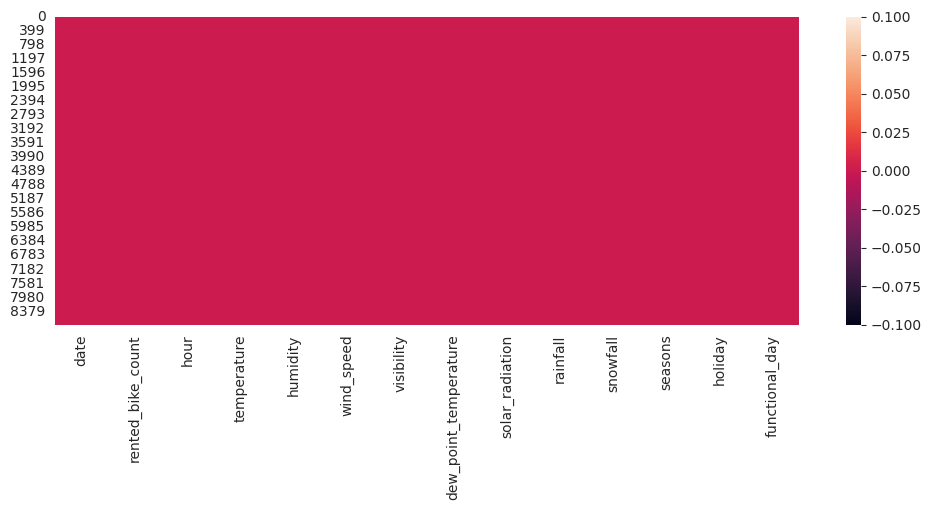

In [47]:
plt.figure(figsize=(12,4))
sns.heatmap(seoul_bike_sharing_df.isnull())

Luckily for us there are no missing values in this dataset. If there were any missing values we would have to deal with them before moving further. We could either drop the rows that contain missing values or fill them with the mean or median of the column.

<h4 id="2c2">Duplicated data</h4>

Duplicate entries can be a problem when working with data. Let's check if there are any duplicate entries in this dataset. We will use the <code>duplicated()</code> method.
```python

In [48]:
print("There a are {} duplicate values in the dataset".format(seoul_bike_sharing_df.duplicated().sum()))

There a are 0 duplicate values in the dataset


No duplicate entries were found in the dataset.

<h4 id="2c3">Unique values<h4>

In [49]:
unique_values_df = seoul_bike_sharing_df.apply(lambda x: len(x.unique()))
unique_values_df

date                      365
rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functional_day              2
dtype: int64

The unique values that give us the most information are the ones in the categorical columns. We have 4 unique values in the `Seasons` column, 2 unique values in the `Holiday` column and 2 unique values in the `Functional Day` column.

<h4 id="2c4">Outliers</h4>

In [50]:
#outliers for each numerical column
numerical_features = [feature for feature in seoul_bike_sharing_df.columns if seoul_bike_sharing_df[feature].dtypes != 'O']
numerical_features.remove('date')
numerical_features

['rented_bike_count',
 'hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature',
 'solar_radiation',
 'rainfall',
 'snowfall']

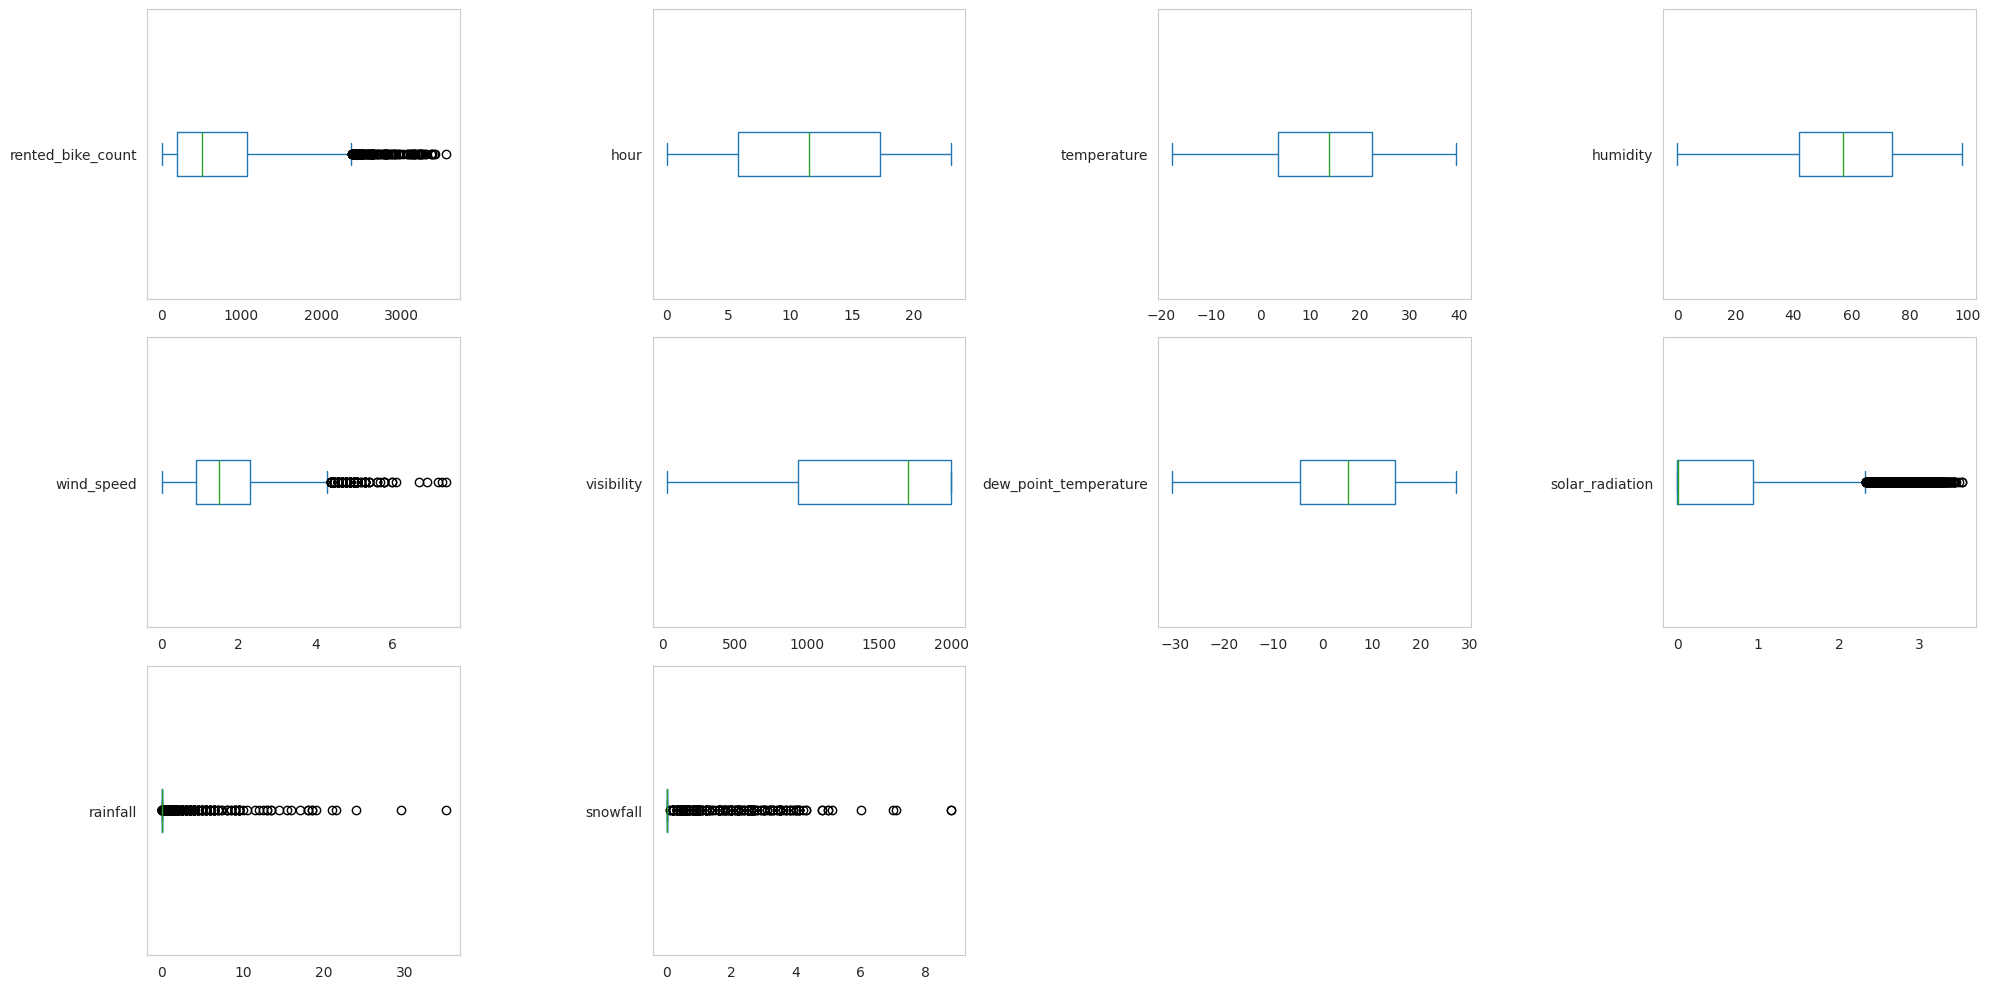

In [51]:
sns.set_style("whitegrid", {'axes.grid' : False})
figure, ax = plt.subplots(figsize=(20,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    seoul_bike_sharing_df[feature].plot(kind='box', vert=False)

plt.tight_layout()

We notice from these boxplots that there are multiple outliers for some of the features. However, the concerned features are mostly related to weather conditions. We will not remove these outliers because they are not errors in the data. They are just extreme values that are not very common.

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="3">Feature extraction</h2>

<h3 id="3a">Looking at the number of rented bikes for functional days</h3>

<Axes: xlabel='hour', ylabel='rented_bike_count'>

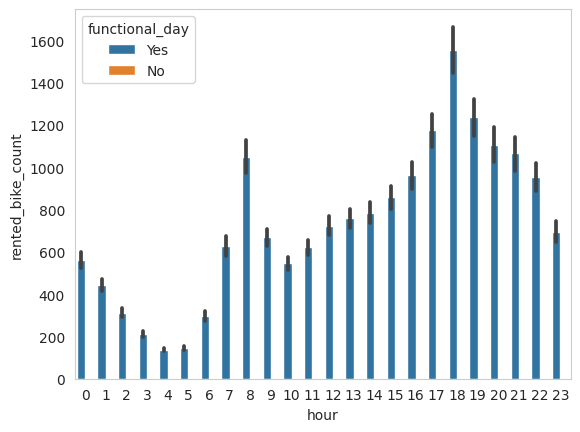

In [52]:
sns.barplot(data=seoul_bike_sharing_df, x='hour', y='rented_bike_count', hue='functional_day')

In [53]:
# sum of rented bikes per functional day
seoul_bike_sharing_df.groupby('functional_day')['rented_bike_count'].sum()

functional_day
No           0
Yes    6172314
Name: rented_bike_count, dtype: int64

We quickly understand that there is no need to keep the `Functioning Day` column since it is always `Yes` and rented bikes are only given out during functional days. First we remove data of non functional days then drop this column.

In [54]:
# Save all the days where the bikes are functional
seoul_bike_sharing_df = seoul_bike_sharing_df[seoul_bike_sharing_df['functional_day'] == "Yes"]

In [55]:
# Drop the functional_day column as it is no longer necessary
seoul_bike_sharing_df.drop('functional_day', inplace=True, axis=1)

In [56]:
# # Look at the new shape of the dataframe
print("This is the new shape of the dataset: {}".format(seoul_bike_sharing_df.shape))
print("The new dataset has {} rows and {} columns.".format(seoul_bike_sharing_df.shape[0], seoul_bike_sharing_df.shape[1]))

This is the new shape of the dataset: (8465, 13)
The new dataset has 8465 rows and 13 columns.


# **Converting from categorical to numeric data using LabelEncoder**

We will start by encoding the categorical features. Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns. For example when we have a categorical feature with two categories such as `Holiday` and `No holiday` we can encode them as `0`(to represent `Holiday`) and `1`(to represent `No Holiday`) respectively. We will also add the `hour` column to the list  since it is a cyclical feature but we can do that later. We will use the `pandas.get_dummies()` method to encode the categorical columns. We will also change the `hour` column to a categorical column since it is a cyclical feature.

<h2>Starting with the holiday column

In [57]:
# Create a binary column for "Holiday"
seoul_bike_sharing_df['Holiday_Binary'] = (seoul_bike_sharing_df['holiday'] == 'Holiday').astype(int)

seoul_bike_sharing_df.head(5)

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,Holiday_Binary
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,0


Drop the column "holiday"

In [58]:
seoul_bike_sharing_df.drop('holiday',axis=1, inplace=True)

<h2>Transfrom the season column into 4 columns

In [59]:
# Transfrom the season column into 4 columns using the get_dummies fonction to convert theh season column into 4 numeric columns

seoul_bike_sharing_df = pd.get_dummies(seoul_bike_sharing_df, columns=['seasons'], prefix='Season')
seoul_bike_sharing_df

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Holiday_Binary,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0


<h2>Extracting the day, month and year from the colum date and creating new numeric columns

For the visualization part we will directly put the names of the months and days in the graphs. However, for the machine learning part we will need to convert these names into numbers. We will create three new columns: `day`, `month` and `year` and fill them with the corresponding values.

In [60]:
seoul_bike_sharing_df['months'] = seoul_bike_sharing_df['date'].dt.month
seoul_bike_sharing_df['years'] = seoul_bike_sharing_df['date'].dt.year
seoul_bike_sharing_df['days'] = seoul_bike_sharing_df['date'].dt.day



In [61]:
seoul_bike_sharing_df

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Holiday_Binary,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,months,years,days
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0,11,2018,30


<h2> Drop the column date

In [62]:
seoul_bike_sharing_df.drop('date', axis=1, inplace=True)

In [63]:
seoul_bike_sharing_df

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,Holiday_Binary,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,months,years,days
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,12,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,0,0,0,11,2018,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,0,0,0,11,2018,30


<h3 id="4a">Describe</h3>

In [64]:
seoul_bike_sharing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
rented_bike_count,8465.0,729.156999,642.351166,2.0,214.0,542.00,1084.00,3556.00
hour,8465.0,11.507029,6.920899,0.0,6.0,12.00,18.00,23.00
temperature,8465.0,12.771057,12.104375,-17.8,3.0,13.50,22.70,39.40
humidity,8465.0,58.147194,20.484839,0.0,42.0,57.00,74.00,98.00
wind_speed,8465.0,1.725883,1.034281,0.0,0.9,1.50,2.30,7.40
visibility,8465.0,1433.873479,609.051229,27.0,935.0,1690.00,2000.00,2000.00
dew_point_temperature,8465.0,3.944997,13.242399,-30.6,-5.1,4.70,15.20,27.20
solar_radiation,8465.0,0.567868,0.868245,0.0,0.0,0.01,0.93,3.52
rainfall,8465.0,0.149120,1.125540,0.0,0.0,0.00,0.00,35.00
snowfall,8465.0,0.077685,0.444063,0.0,0.0,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable. As we said when we were looking at the outliers, The `wind_speed`, `dew_point_temperature`, `solar_radiation`, `rainfall` and `snowfall` column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value. <br>

Looking at the statistics of our data set we can see that the max rented bike count for an hour in this data set is 3556. Which is pretty much considering the mean rented bike count for an hour which is equal to 704, so 5 times the mean.

<h3 id="4b">Influence that the features have on the number of bikes rented</h3>

If this was not stated from the beginning, the target variable for this data set willl be our `Rented Bike Count` column. The rest of the features in this data set will help us understand the influence that they have on the number of bikes rented. During this Exploratory Data Analysis (EDA) we will try to visualize the influence that each feature has on the number of bikes rented.

<h4>What does the distribution for each numerical column look like?</h4>

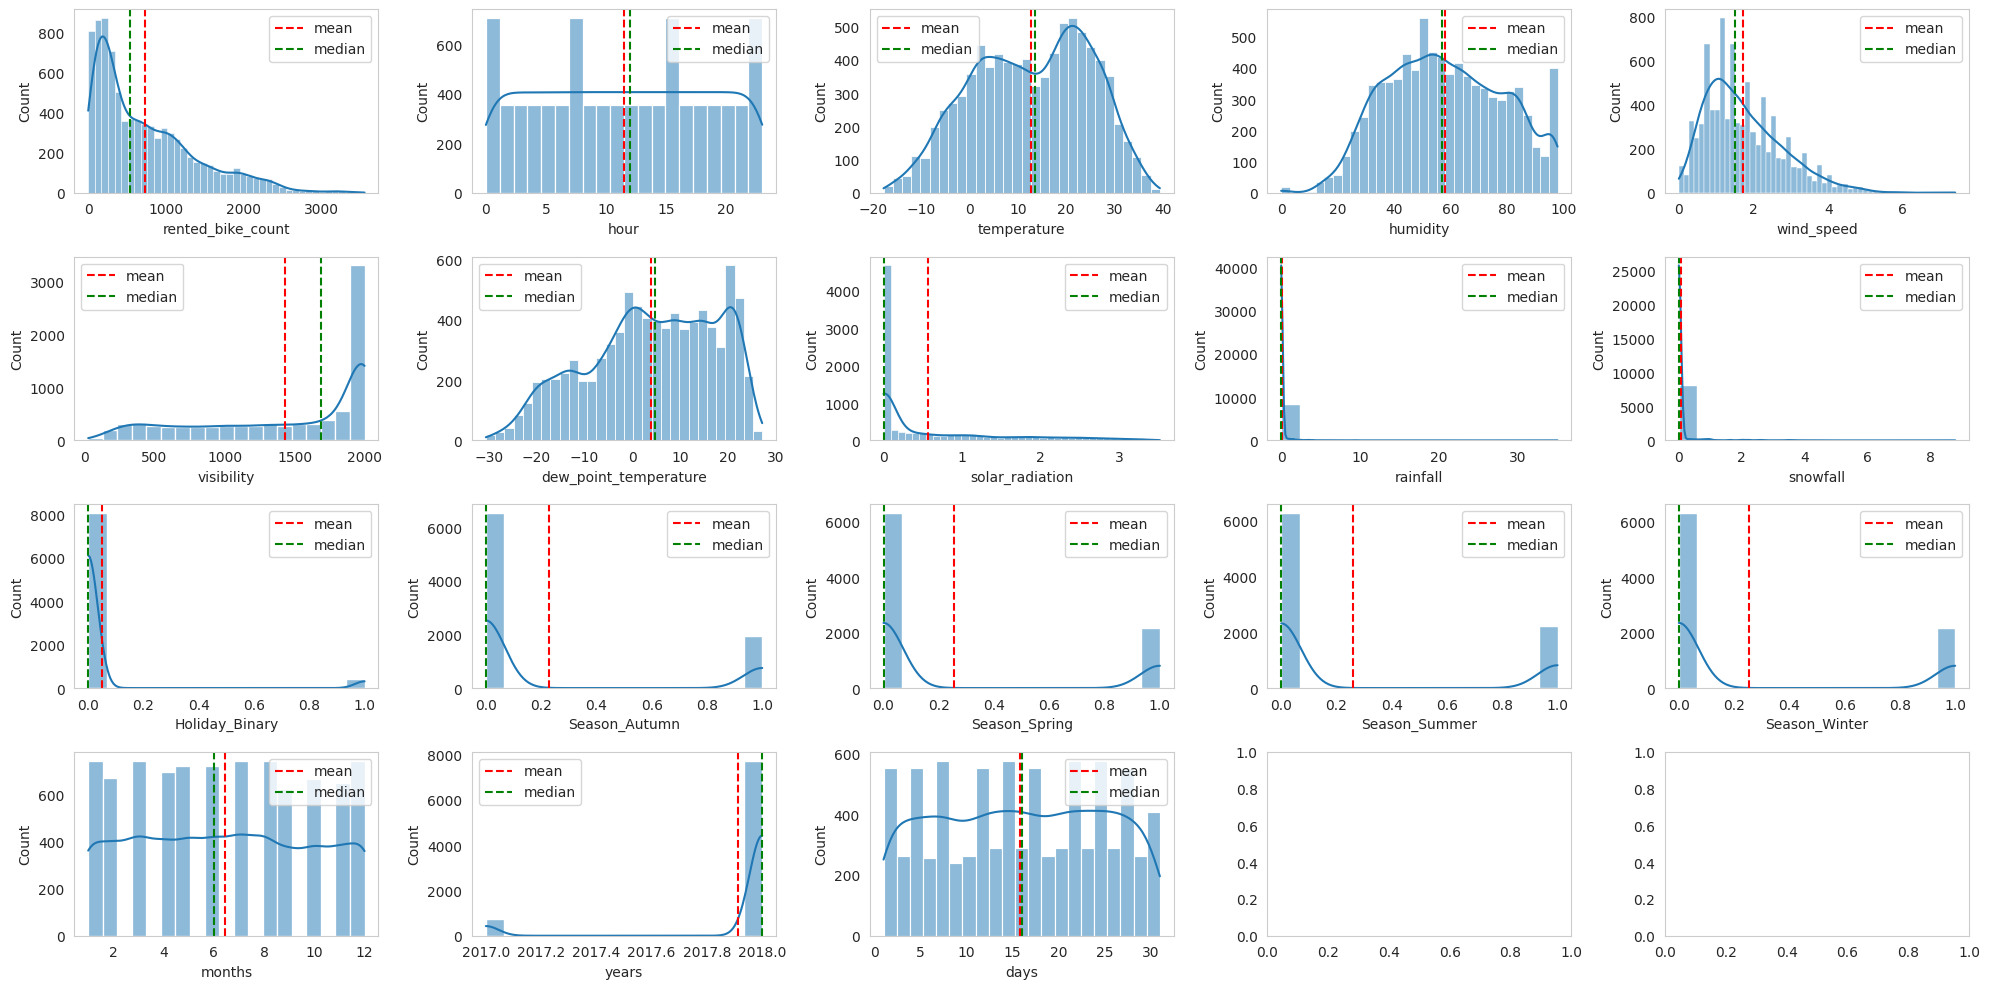

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall', 'Holiday_Binary', 'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'months', 'years', 'days']

# Define the layout of the subplots
rows = 4  # Increased the number of rows
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(seoul_bike_sharing_df[feature], kde=True, ax=axes[i])
    axes[i].axvline(x=seoul_bike_sharing_df[feature].mean(), c='red', ls='--', label='mean')
    axes[i].axvline(x=seoul_bike_sharing_df[feature].median(), c='green', ls='--', label='median')
    axes[i].legend()
    axes[i].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()


From the histograms we can observe that the `Rented Bike Count` column is skewed to the right. This means that most of the values are concentrated on the left side of the histogram. Other columns that are also skewed to the right are the `wind_speed`, `solar_radiation`, `rainfall`, and `snowfall` columns. For these columns the mean is greater than the median meaning that the mean overestimates the most common values in a positively skewed distribution.<br>

We can also observe that the `Hour` column has a sort of uniform distribution although there are distinct peaks representing the hours where people mostly use the bikes. The column `humidity` appears to have a normal distribution. This means that the mean and median are almost equal. <br>

The `temperature`, and `dew_point_temperature` columns appear to be bimodal and multimodal. This means that there is more than one peak for the distributions but there is no skew.<br>

TFinally he `visibility` and `year` columns are also skewed to the left. This means that most of the values are concentrated on the right side of the histogram and that the median is greater than the mean.<br>

Since the presence of skews indicate that their is the presence of outliers it can affect statistical analyses that assume normality and may require transformation of the data before conducting certain analyses.

<h4>What are the moments where people rent the most bikes?</h4>

Let's look at the time stamp variables such as `year`, `month`, `day`, and `hour` to see if we can find any patterns.



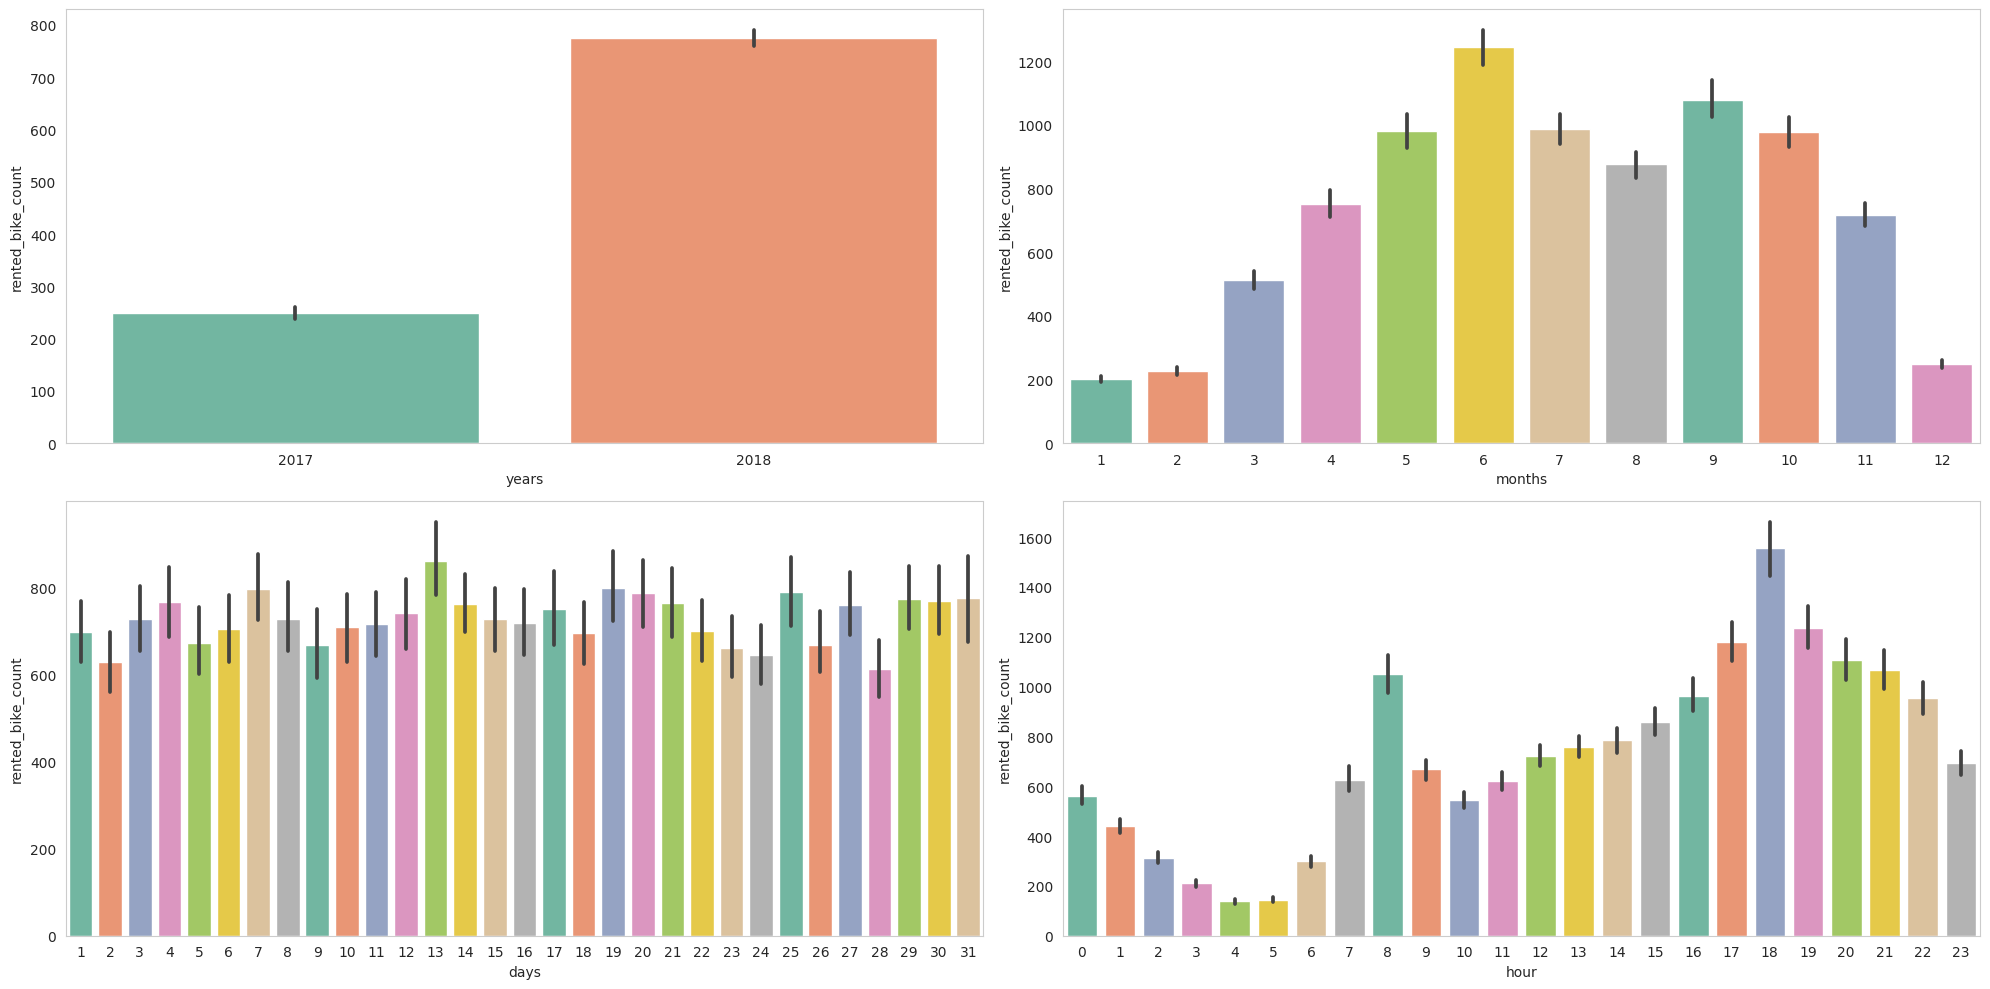

In [66]:
# Create a dataframe with just the time stamp features
time_stamp_df = seoul_bike_sharing_df[['years', 'months', 'days', 'hour']]

# Create visualizations with the total number of bikes rented per year, month, day and hour on the y-axis and the year, month, day and hour on the x-axis
figure, ax = plt.subplots(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.barplot(data=seoul_bike_sharing_df, x='years', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 2)
sns.barplot(data=seoul_bike_sharing_df, x='months', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 3)
sns.barplot(data=seoul_bike_sharing_df, x='days', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 4)
sns.barplot(data=seoul_bike_sharing_df, x='hour', y='rented_bike_count', palette='Set2')

plt.tight_layout()

We notice from these bar plots that the number of bikes rented is higher during the months of  <b>June, July, and September</b>. This is probably because the weather is warmer during these months. The months with the least number of rented bikes is **December, January, and February** probably because the weather is colder. We will later confirm this by looking at the analysis of categorical features. <br>

We also notice that the number of bikes rented is higher during the hours of **8, 17, 18, and 19**. This is probably because people are going to work or coming back from work during these hours.<br>

Also people **rent more during the weekdays** than during the weekends. This is probably because people use the bikes to go to work during the weekdays.<br>

Other than that we can also notice that there is a slight increase in the number of bikes rented during the year **2018**. This is probably because the bike sharing system become more popular or the data started to record late in 2017.

<Axes: title={'center': 'Temperature repartition in a day'}, xlabel='hour', ylabel='temperature'>

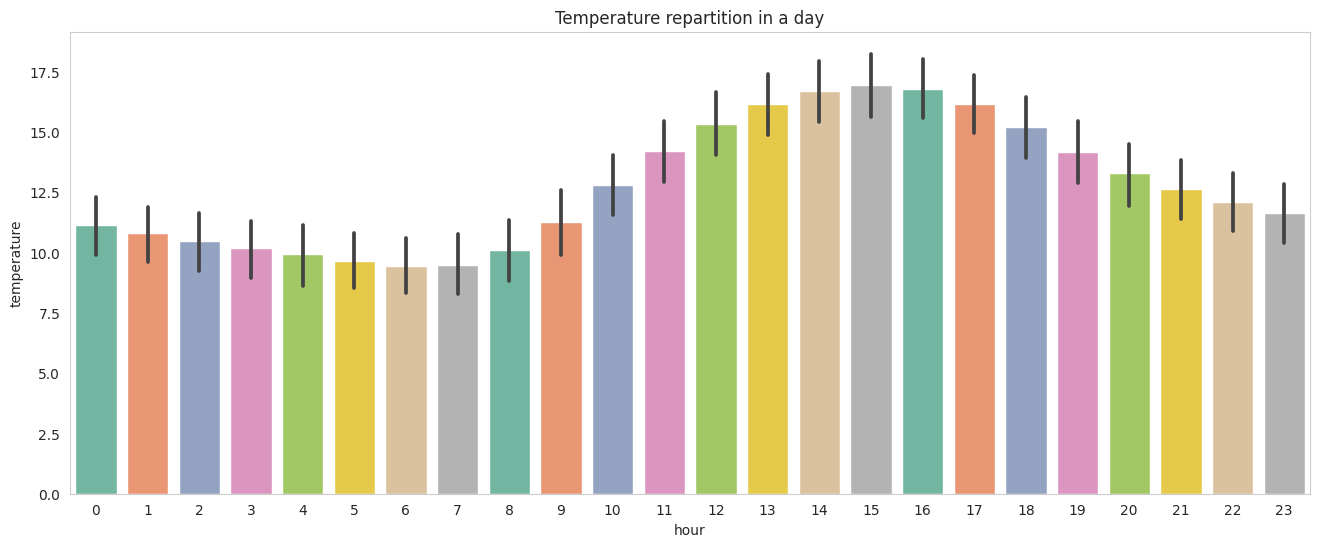

In [67]:

plt.figure(figsize=(16,6))
plt.title("Temperature repartition in a day")
sns.barplot(data=seoul_bike_sharing_df,x="hour",y="temperature",palette="Set2")

With those plots we can also see that people do not necessarily use bikes during the warmer period of the day.

<h4>Exploring our categorical features</h4>

From these point plots we have a lot of information, let's analyze them one by one:

- `seasons`: We notice that the number of bikes rented is higher during the **Summer** and **Autumn** seasons. This is probably because the weather is warmer during these seasons. This confirms the high correlation between the number of rented bikes and the temperature, the temperature being warmer in summer. The season with the least number of rented bikes is **Winter** probably because the weather is colder. This confirms what we said earlier when we were looking at the months.
- `holiday`: We notice that the number of bikes rented is higher during **non holidays**. This is probably because people use the bikes to go to work and don't use the bikes during the holidays. With the help of the `days` column we can confirm that the days with the least number of rented bikes are **Saturday** and **Sunday** and that therefore people use the bikes to go to work.

A noticeable trend emerges from these visualizations regarding the timing of bike rentals. The number of bikes rented is higher during **peak hours**, meaning when people are commuting to work and back home.

<h3 id="4c">Scatter Plot</h3>

We will use the scatter plot to visualize the relationship between the `Rented Bike Count` column and the other numerical columns.


In [68]:
# # Look at the relationship between the numerical features and the target variable

# figure, ax = plt.subplots(figsize=(20,10))
# for i, feature in enumerate(numerical_features):

#     if feature == 'rented_bike_count':

#         pass

#     else:
#         plt.subplot(3, 4, i+1)
#         sns.scatterplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count')
#         sns.regplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count', scatter=False, color='red')
#         plt.xlabel(feature)

# plt.tight_layout()


In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming numerical_features is a list of your features
num_features = len(numerical_features)

# Calculate rows and columns for the subplot grid
cols = int(math.sqrt(num_features))
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# Removing 'rented_bike_count' from numerical_features if it's there
if 'rented_bike_count' in numerical_features:
    numerical_features.remove('rented_bike_count')

# Iterate over each feature and plot
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count', ax=axes[i])
    sns.regplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count', scatter=False, color='red', ax=axes[i])
    axes[i].set_xlabel(feature)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


From these plots we notice that some of the features have a positive linear relationship with the target `rented_bike_count` column and others have a negative linear relationship.

<h3 id="4d">Correlation Plot</h3>

The correlation matrix will help us understand the relationship between the numerical columns. It will also help us understand which features are more correlated with the target variable. Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.



<Axes: >

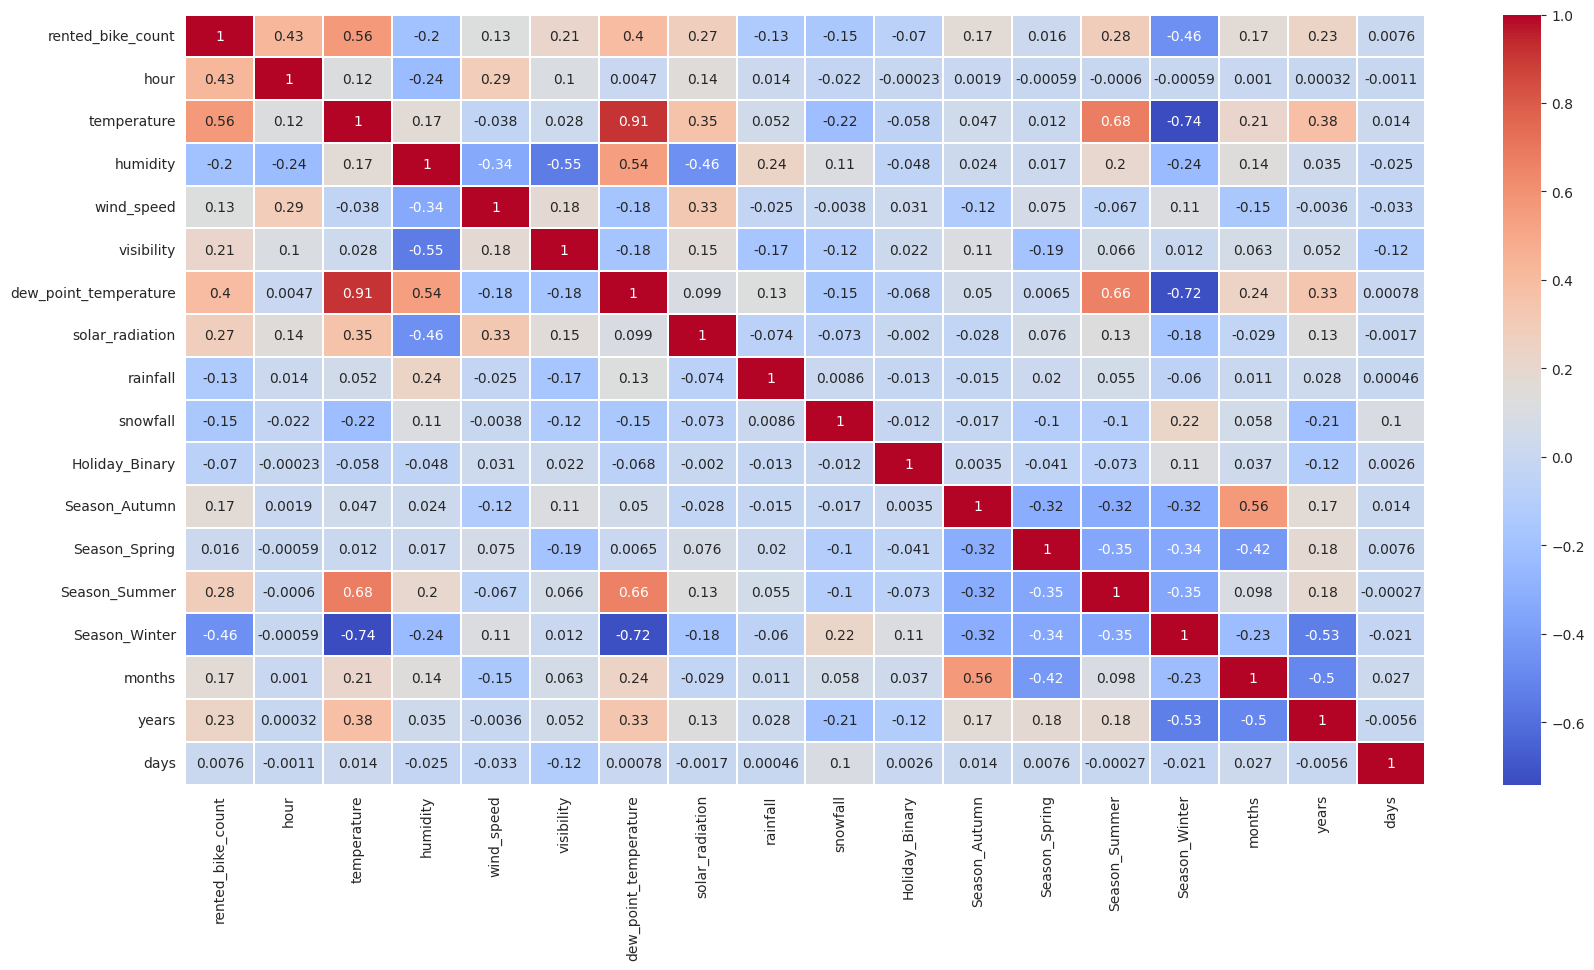

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(seoul_bike_sharing_df[numerical_features].corr(), cmap='coolwarm', annot=True, linewidths=0.1, linecolor='white')

We know correlation helps us express the strength of the relationship between two variables. As we observed from the previous plot, the target variable has positive and negative correlations with the other variables. But we can also use it to see multicollinearity between features. Indeed there is a strong positive correlation between the `temperature` and `dew_point_temperature` columns. This means that these two features are highly correlated and that we can drop one of them without losing much information. We will drop the `dew_point_temperature` column since it is less correlated (**0.4** compared to **0.56** for the `temperature` column) with the target variable.

Before deleting the `dew_point_temperature` we can see that with our target variable (Rented Bike Count), the most correlated variables are `hour`, and `temperature`.

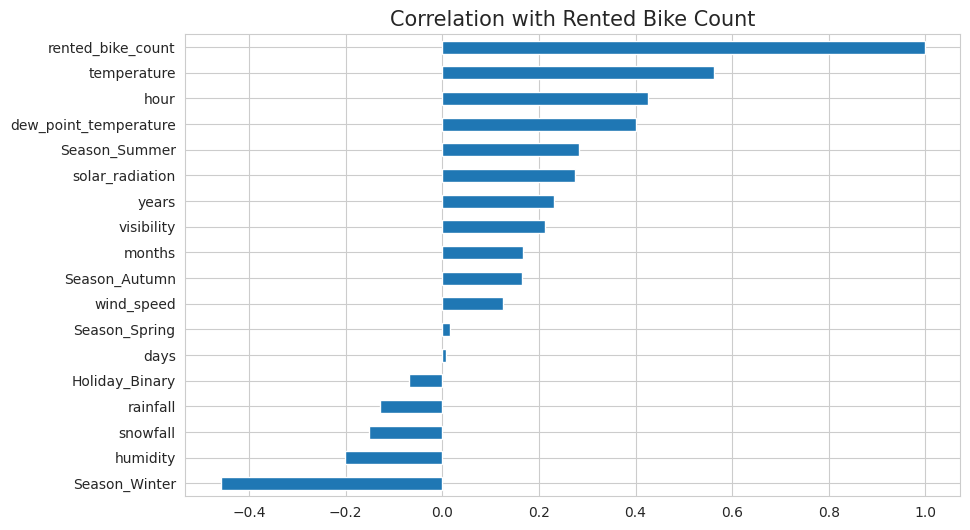

In [71]:
plt.figure(figsize=(10,6))
target_variable = round(seoul_bike_sharing_df[numerical_features].corr().iloc[0].sort_values(), 3)
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,6),grid=True);
plt.title("Correlation with Rented Bike Count",fontsize=15,fontweight="medium")
plt.show()

In [72]:
# Drop the dew_point_temperature column as it is highly correlated with the temperature column
seoul_bike_sharing_df.drop('dew_point_temperature', axis=1, inplace=True)

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="5">Feature Engineering</h2>

<h3 id="5b">Transformation of the target variable</h3>

Before moving on, we had seen previously that our target variable `Rented Bike Count` was skewed to the right. We have to apply a method to reduce the skewness of the target variable. There are different methods that we can refer to such as the logarithmic transformation or the square root transformation. Let us compare the different transformations and see which one is the best.

- <u>The square root transformation</u> is typically used when the data is moderately skewed to the rigth. It transforms values from **y** to **sqrt(y)**.
- <u>The log  transformation</u> has major effects on the distribution shape and is also often used to reduce right skewness. It transforms values from **y** to **log(y)**.

Text(0.5, 1.0, 'Square root')

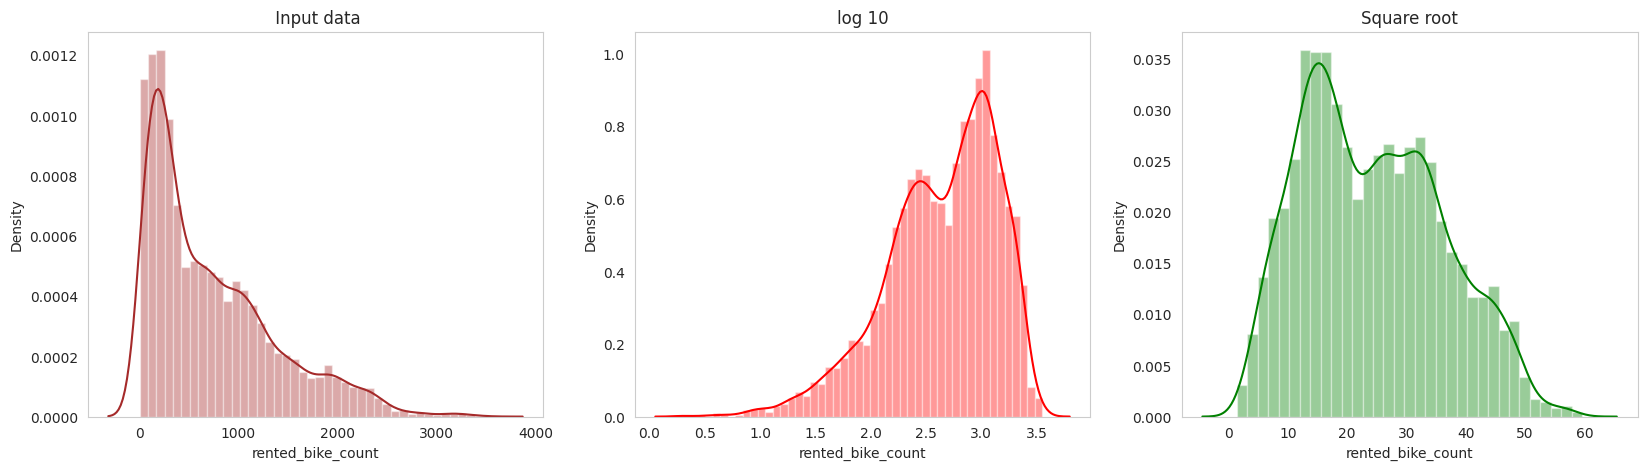

In [73]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot((seoul_bike_sharing_df['rented_bike_count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log10(seoul_bike_sharing_df['rented_bike_count']+0.0000001),ax=axes[1],color='red').set_title("log 10") #transformation is only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(seoul_bike_sharing_df['rented_bike_count']),ax=axes[2], color='green').set_title("Square root") #main advantage as it can be applied to zero values

By looking at the different plots we can see that the **square root transformation** is the best one to use since it reduces the skewness of the target variable the most and the data is normalized to some point. Thus, we will use the square root transformation to normalize the target variable. Plus we do not end up with any missing values because there are no negative values in the `rented_bike_count` column.

In [74]:
seoul_bike_sharing_df['rented_bike_count'] = np.sqrt(seoul_bike_sharing_df['rented_bike_count'])

<h3 id="5c">Feature Selection</h3>

Feature selection methods are here to help us reduce the number of input variables to collect the ones that are going to be the most beneficial for our model. By reading [this article](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) from Machine Learining Mastery, we found a framework that will help us choose the most adapted method for our problem.



For our data, our input variables are mostly numerical variables and our output variable is also numerical. Therefore we can either use Pearson's or Spearman's for the feature selection. In our case we will use **Pearson's** because it is more adapted for linear relationships while Spearman's is more adapted for monotonic relationships. We will declare x and y as follows:

The column `rented_bike_count` is now normalized. As we said before it is the target variable and therfore the value we want to predict. The data from the other columns, the features, can be used as inputs for the model that we will create in a later section. We create a list **x** of the data that can be used as input for the training and a list **y** for the target variable.

In [75]:
x = seoul_bike_sharing_df.drop('rented_bike_count', axis=1)
y = seoul_bike_sharing_df['rented_bike_count']

In [76]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7ab981ff8790>)

In [77]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100
print(feature_contribution)

[1.29989359e+01 3.33092657e+01 3.59217950e+00 8.79969717e-01
 3.39179070e+00 7.45649773e+00 1.98468647e+00 1.95937235e+00
 4.27420473e-01 2.25988729e+00 2.20062388e-02 5.66910569e+00
 1.98554945e+01 2.36334269e+00 3.81581839e+00 1.42266409e-02]


hour : 13.00%
temperature : 33.31%
humidity : 3.59%
wind_speed : 0.88%
visibility : 3.39%
solar_radiation : 7.46%
rainfall : 1.98%
snowfall : 1.96%
Holiday_Binary : 0.43%
Season_Autumn : 2.26%
Season_Spring : 0.02%
Season_Summer : 5.67%
Season_Winter : 19.86%
months : 2.36%
years : 3.82%
days : 0.01%


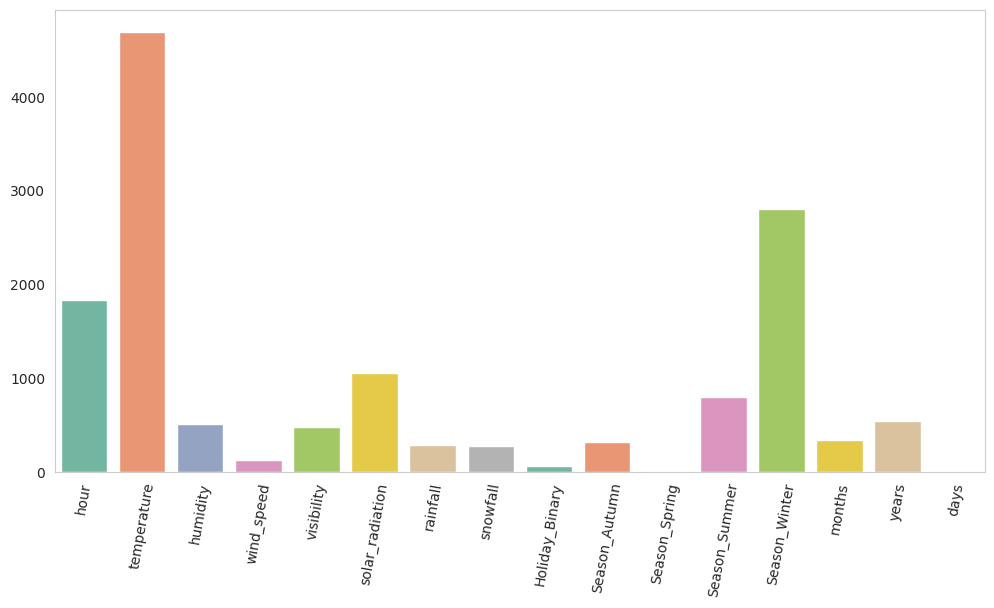

In [78]:
for i,j in enumerate(x.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=x.columns,y=fs.scores_, palette='Set2')
plt.xticks(rotation=80)
plt.show()

<h3 id="5d">Splitting data into Train & Test sets</h3>

Before proceding to the feature scaling and modeling let's split our data set into a training set and a test set. We will use the `train_test_split()` method from the `sklearn.model_selection` module. The distribution of our data will be the following: **70% of the data for training and 20% for testing**.



In [79]:
# Method to split the data into train and test set
def split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [80]:
x_train, x_test, y_train, y_test = split(x, y)

Let's take a look at the data that we have for training and testing.

In [81]:
print(f'The shape of the train and test set for the features: x_train = {x_train.shape}, x_test = {x_test.shape}')
print(f'The shape of the train and test set for the target: y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the features: x_train = (5925, 16), x_test = (2540, 16)
The shape of the train and test set for the target: y_train = (5925,), y_test = (2540,)


<h3 id="5e">Feature Scaling</h3>

In the last step of this feature engineering section we will scale the data. Scaling the data is important because it will help us avoid the problem of having features with different scales. We can either choose the **Standardization** or the **Normalization** method. For our dataset, since we have a lot of features with outliers and normalization does not respond well to such cases, we will use the **Standardization** method.

In [82]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="6">Model Building</h2>

The type of problem that we have requires the use of a supervised machine learning technique as we have a set of input variables and based on those we want to predict an output variable. There are different types of supervised learning techniques but in our case we shall use the a regression model because we want to understand the relationship between dependable and independent variables. Moreover, it is a type of supervised learning that learns from labelled data sets to predict continuous output for different data in an algorithm.

There are different types of regression models: <br>

![image.png](attachment:image.png)

We will not go through all of them but use at least 3.

<h3 id="6a">Function to train model</h3>

This is a function that will help us train our model. It will take as input the model that we want to train and the training data and return the y_pred variable which is the prediction of the model on the test data.

In [83]:
#store the models score
training_score=[]
model_list = []

def train_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_train, y_train)
    print("Training Score: {}".format(score))
    training_score.append(score)
    return y_pred

# Finding the best parameters for the model
def best_params(model):
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")

<h3 id="6b">Function to evaluate performance</h3>

Now that we have created our models let us define a function that will help us evaluate the performance of our models. We will use the $R^2$ is a statistical measure that measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Another metric that will evaluate the performance of our model is the $MSE$ (Mean Squared Error) is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value. It is used to check how close estimates or forecasts are to actual values.

In [84]:
#store the results of different models in lists
mean_squared_error_list = []
r2_score_list = []

def evaluate_performance(y_test, y_pred):
    #finding the R2 score
    r2 = r2_score(y_test, y_pred)
    print("R2 Score: {}".format(r2))
    #finding the (MSE) Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: {}".format(mse))

    #append the results in the lists
    mean_squared_error_list.append(mse)
    r2_score_list.append(r2)

    return r2, mse

<h3 id="6c">Function to plot</h3>

This function will plot the graph of actual values and predicted values.

In [85]:
def plot(y_test, y_pred):
    figure,ax = plt.subplots(nrows =1, ncols=2, figsize=(20,10))

    sns.regplot(x=y_pred, y=y_test, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"},ax=ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    ax[0].set(title="Scatter plot - Actual vs predicted values")

    # For better visualization we can observe the first 100 values
    ax[1].plot(y_test.values[:100], color='blue', label='Actual')
    ax[1].plot(y_pred[:100], color='red', label='Predicted')

    ax[1].set(title='Prediction')
    ax[1].set_xlabel('Hours')
    ax[1].set_ylabel('Rented Bike Count')
    ax[1].legend()

<h3 id="6d">Linear Regression</h3>

Training Score: 0.6164110857332439
R2 Score: 0.6283366293105085
Mean Squared Error: 51.24577286977865


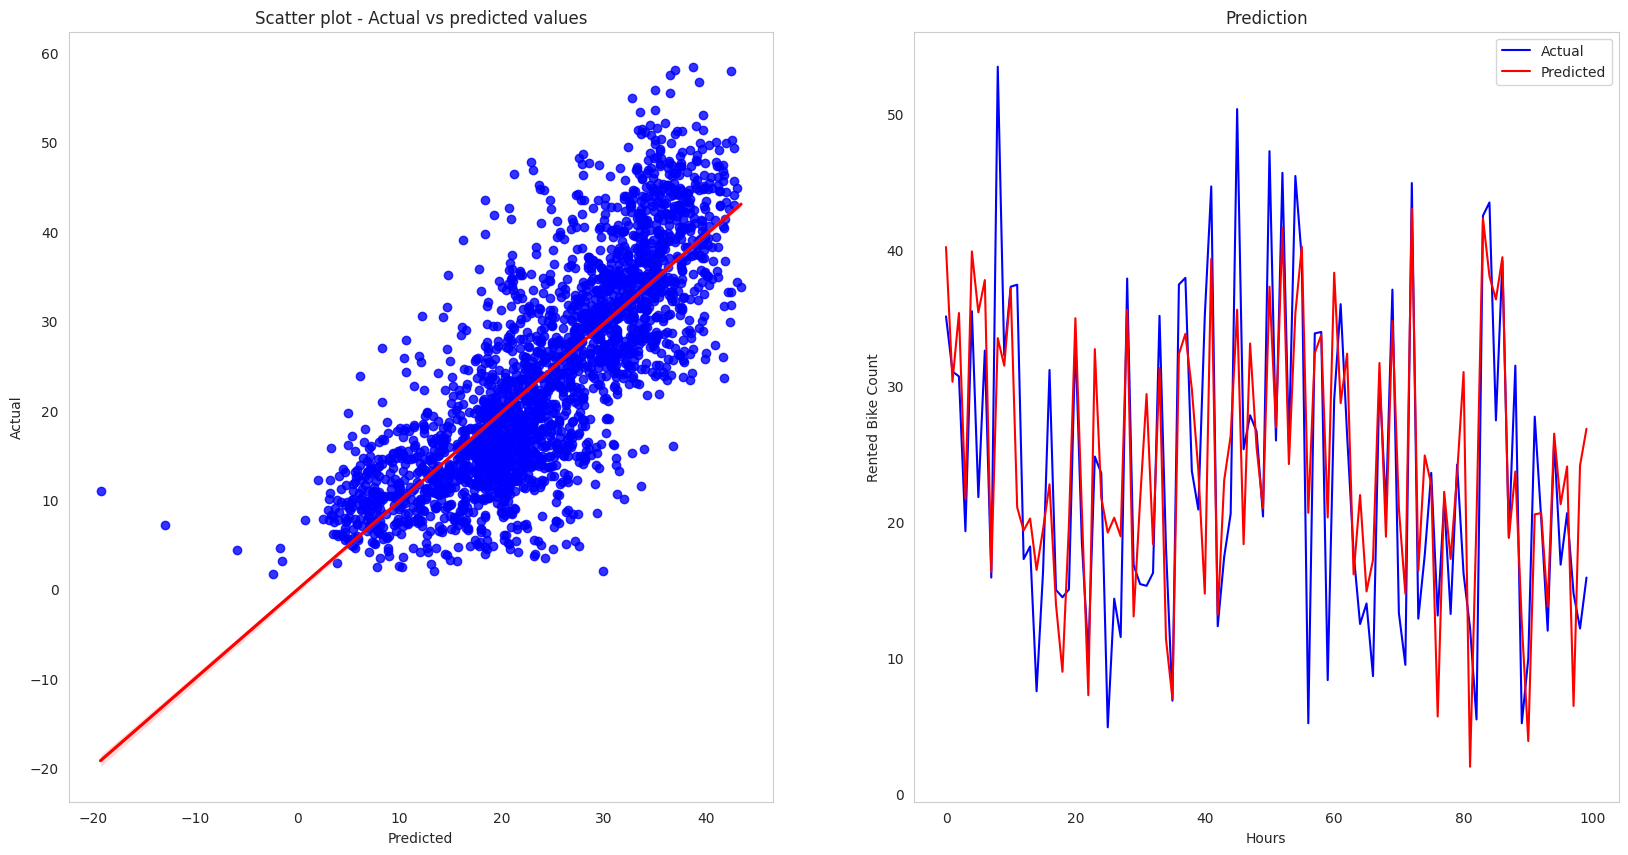

In [86]:
linear_regression = LinearRegression()
model_list.append('Linear Regression')
linear_regression_y_pred = train_model(linear_regression, x_train, y_train, x_test)
r2, mse = evaluate_performance(y_test, linear_regression_y_pred)
plot(y_test, linear_regression_y_pred)

<h3 id="6e">Polynomial Regression</h3>

Polynomial regression is a form of regression analysis where the relationship between the independent variable `x` and dependent variable `y` is modeled as an nth degree polynomial in `x`. We will use the `PolynomialFeatures()` method from the `sklearn.preprocessing` module to transform our data into a polynomial form. We will then use the `LinearRegression()` method from the `sklearn.linear_model` module to train our model.

![image.png](attachment:image.png)

We will start with a polynomial of degree 2 and see how it performs.

Training Score: 0.7469204145763102
R2 Score: 0.7373497135455014
Mean Squared Error: 36.21480615337405


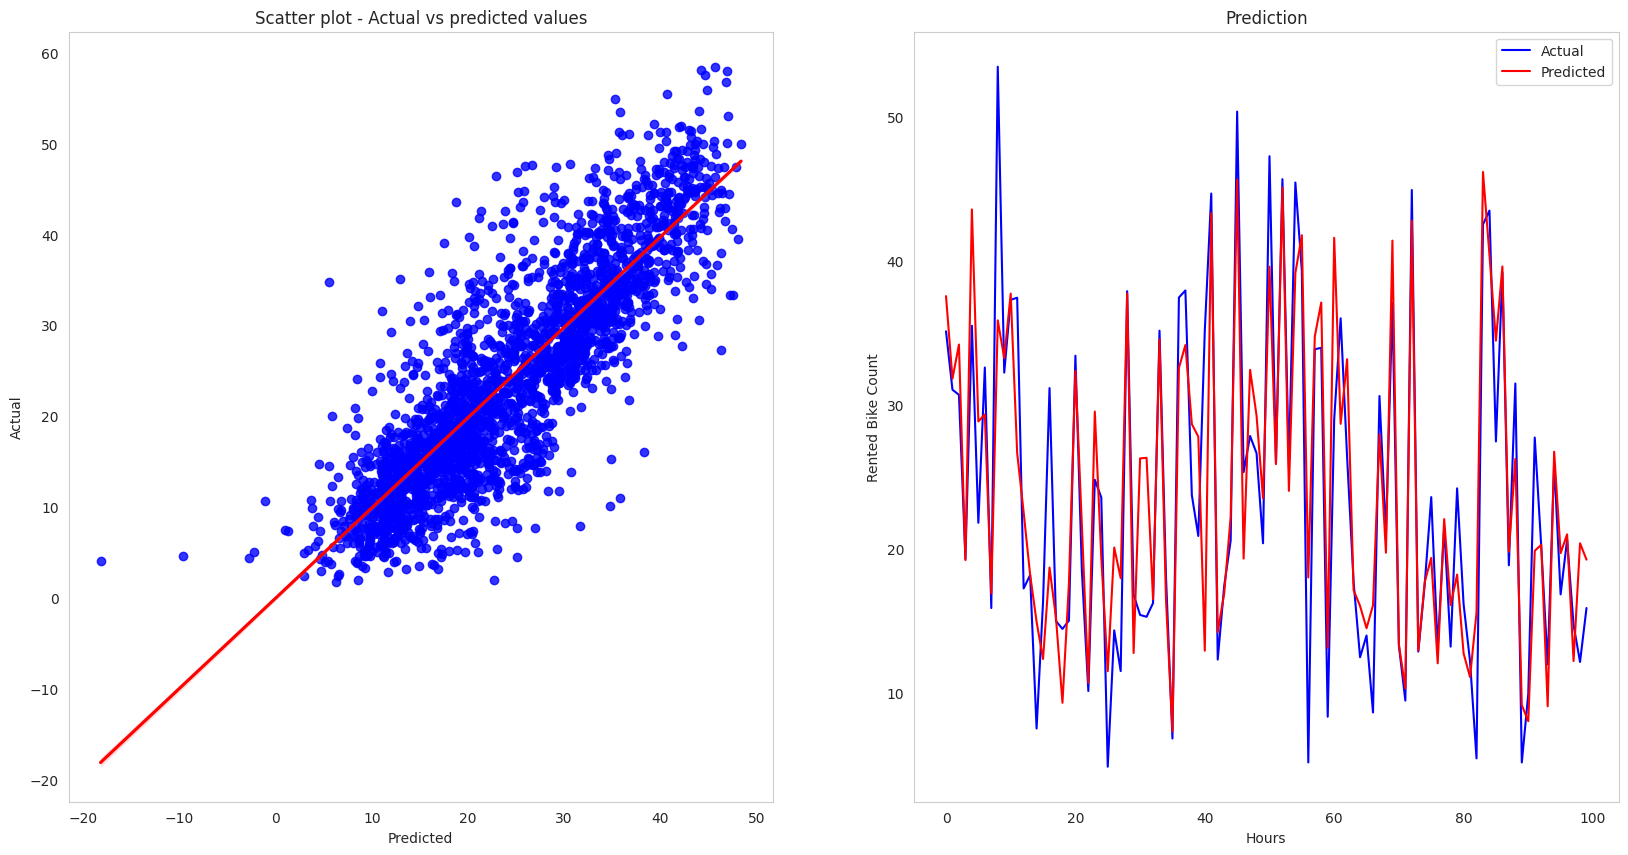

In [87]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)
pol_reg = LinearRegression()
model_list.append('Polynomial Regression')
pol_reg_y_pred = train_model(pol_reg, x_train_poly, y_train, x_test_poly)
evaluate_performance(y_test, pol_reg_y_pred)
plot(y_test, pol_reg_y_pred)

<h3 id="6f">Lasso Regression</h3>

Lasso regression is a regularization technique to make regression models more accurate. By shrinking the coefficients of the features, lasso regression shrinks the data values towards a center point. We will use the `Lasso()` method from the `sklearn.linear_model` module to train our model.

Training Score: -54.37108129717219
The best parameters found out to be :{'alpha': 0.001} 
where model best score is:  -54.77547636477705 

R2 Score: 0.6283562450800461
Mean Squared Error: 51.24306820381029


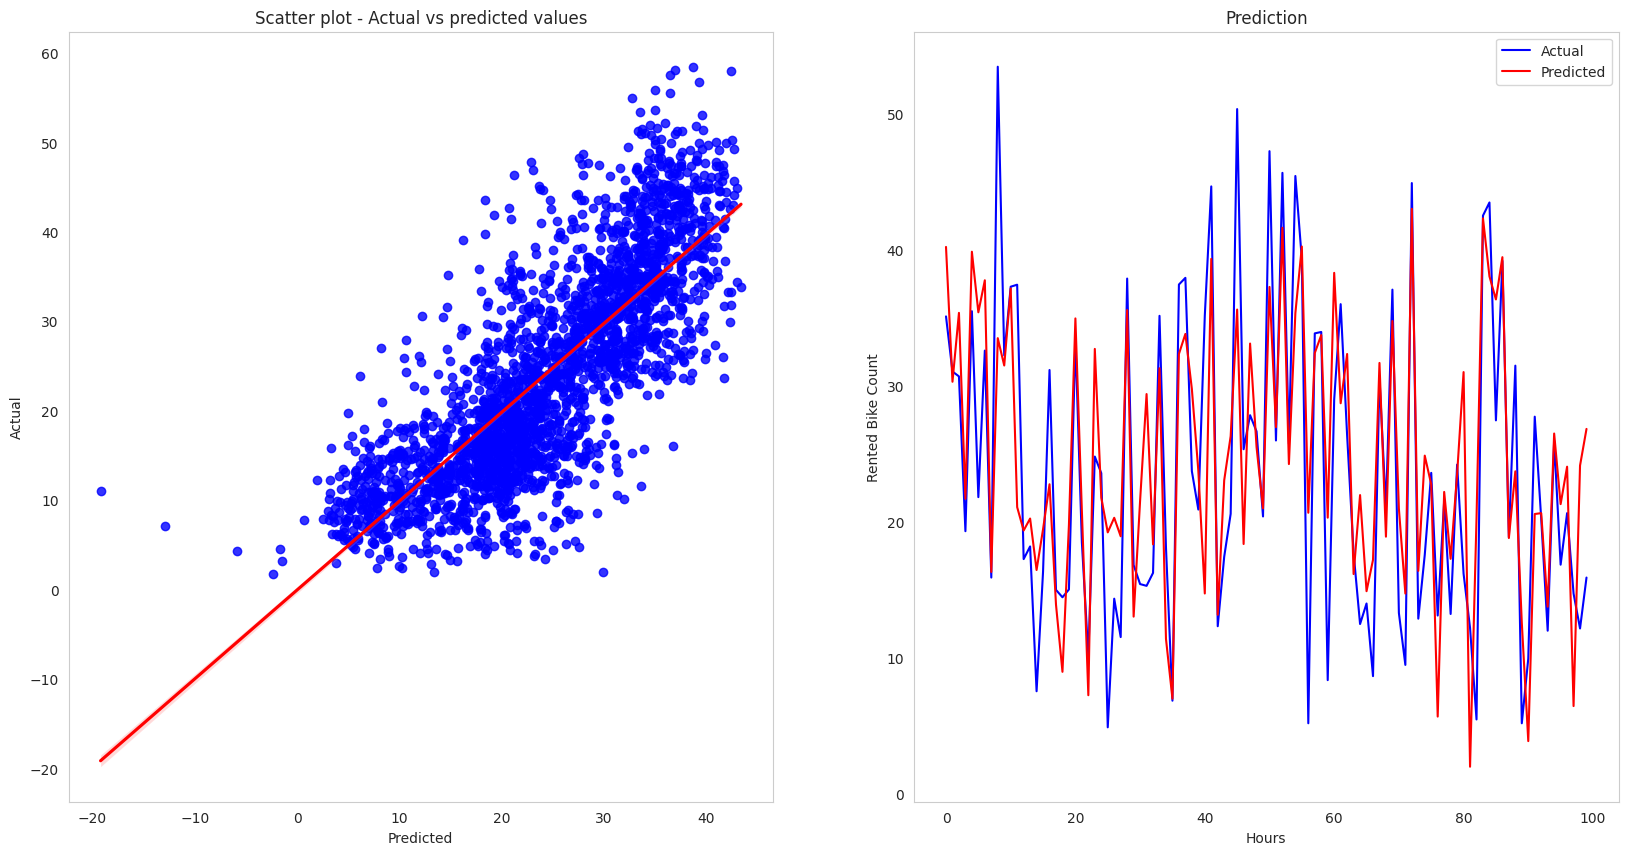

In [88]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha=alpha)

lasso_grid = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_y_pred = train_model(lasso_grid, x_train, y_train, x_test)
best_params(lasso_grid)
evaluate_performance(y_test, lasso_grid_y_pred)
plot(y_test, lasso_grid_y_pred)


<h3 id="6h">Decision Tree Regression</h3>

The Decision Tree algorithm is a versatile and powerful tool in machine learning. Unlike linear models, Decision Trees can capture complex relationships in the data by recursively splitting it based on feature conditions. The process involves selecting the most informative features at each node, leading to a tree structure that facilitates decision-making. In our implementation, we will leverage the `DecisionTreeRegressor` from the `sklearn.tree` module to train our model and harness the interpretability and predictive capabilities inherent in decision trees.

Training Score: 0.8919760047980265
R2 Score: 0.8480889099856738
Mean Squared Error: 20.94583924381002
The best parameters found out to be :{'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 50, 'splitter': 'best'} 
where model best score is:  0.819050627385389 



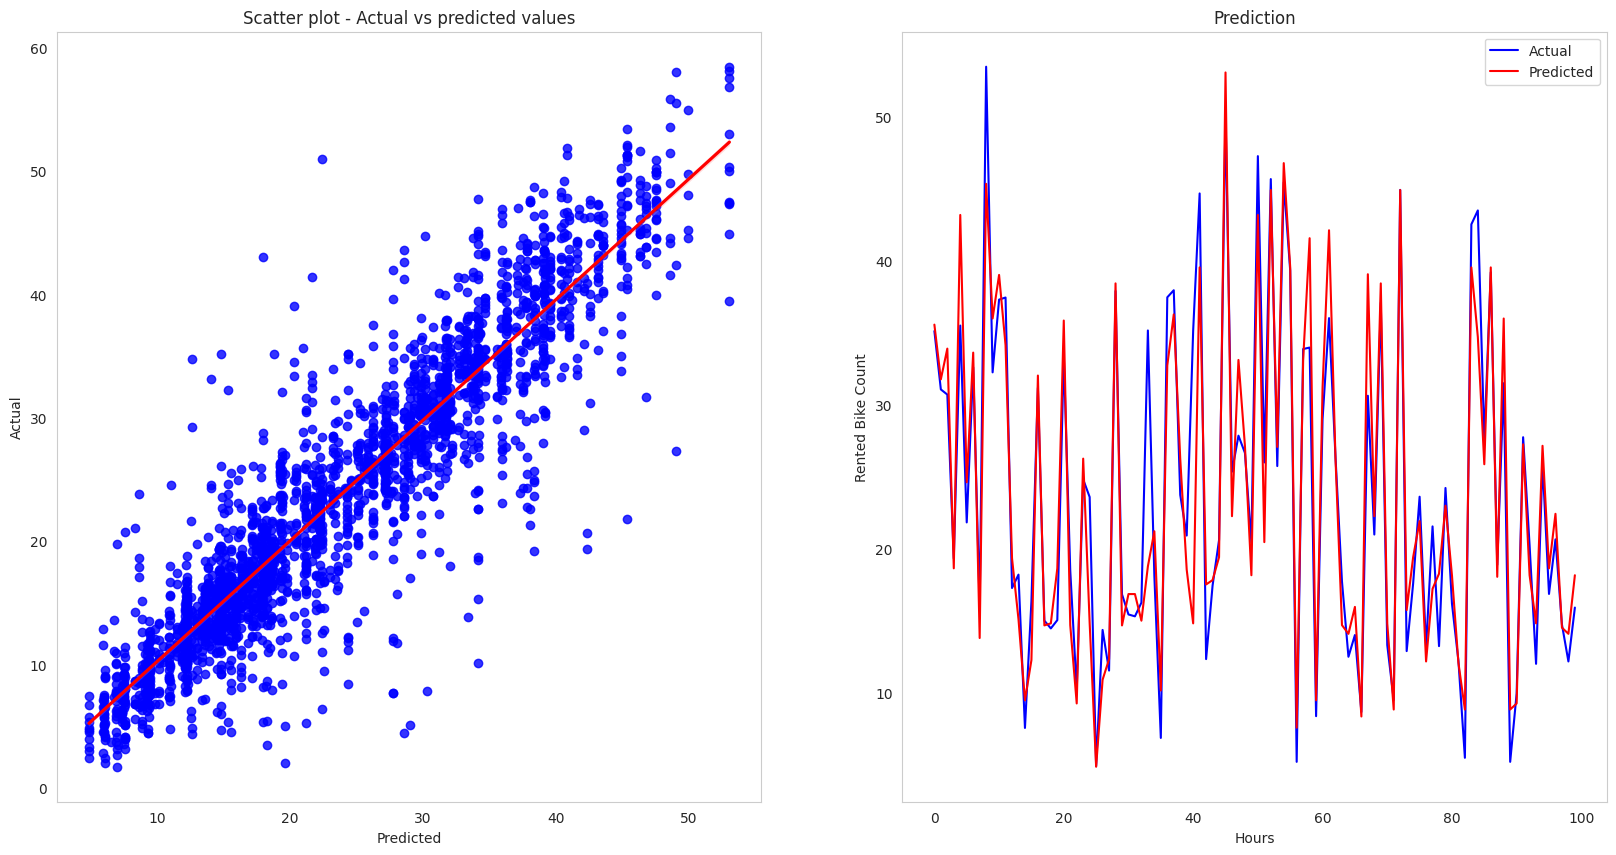

In [89]:
decision_tree = DecisionTreeRegressor()
param_grid = {'criterion' : ["squared_error"],
              'splitter' : ["best", "random"],
              'max_depth' : [5,10,15,20,25],
              'min_samples_split': [10,50,100],
              'max_features': ['auto', 'sqrt', 'log2']}
decision_tree_grid = GridSearchCV(decision_tree, param_grid, cv=2, n_jobs=-1)
model_list.append('Decision Tree Regressor')
decision_tree_y_pred = train_model(decision_tree_grid, x_train, y_train, x_test)
evaluate_performance(y_test, decision_tree_y_pred)
plot(y_test, decision_tree_y_pred)
best_params(decision_tree_grid)

<h3 id="6i">Random Forest Regression</h3>

Random Forest Regression is a powerful ensemble learning method that extends traditional decision tree regression by constructing a multitude of decision trees during training. These trees collectively contribute to more robust predictions, mitigating overfitting and enhancing the model's overall performance. We will leverage the `RandomForestRegressor` from the `sklearn.ensemble` module to build and train our regression model.

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Split the data into features (X) and target (y)
# Done

# Define the model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# fit the model
rf_model.fit(x_train, y_train)

# predict
y_pred = rf_model.predict(x_test)

# evaluate
#mse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)

#print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

R-squared: 0.8964903491704885


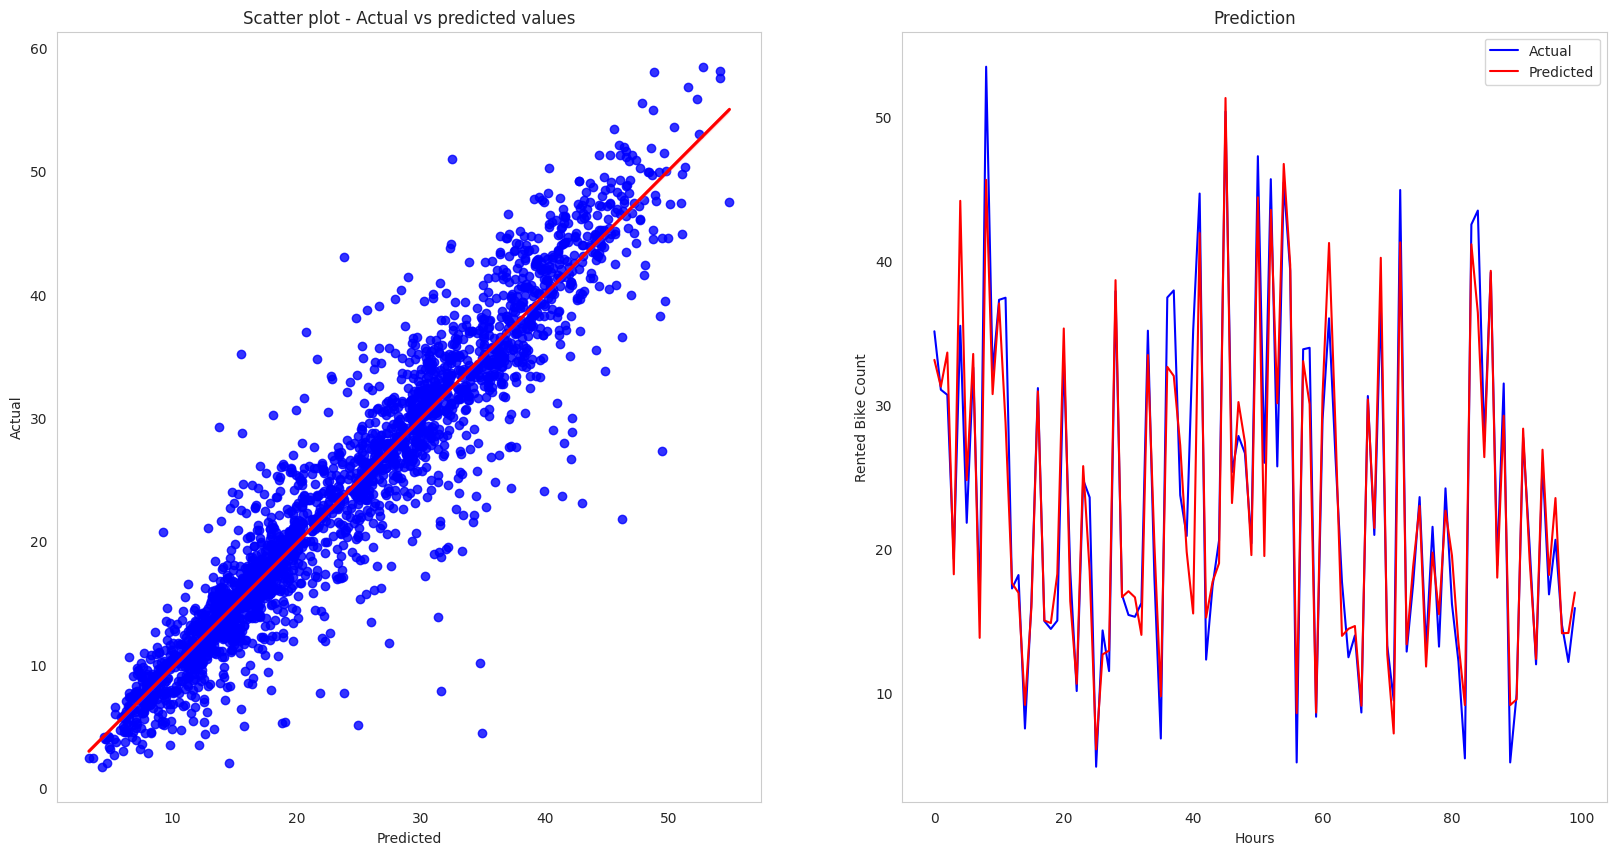

In [91]:
plot(y_test, y_pred)

# RandomForestWith hyperparameter tuning

In [99]:
# With hyperparameter tuning
rf_Model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf_Grid = GridSearchCV(estimator=rf_Model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
model_list.append('Random Forest Regressor')
y_pred_rf = train_model(rf_Grid, x_train, y_train, x_test)
evaluate_performance(y_test, y_pred_rf)
plot(y_test, y_pred_rf)
best_params(rf_Grid)

# Gradient Boosting Regressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3, random_state=42)
gb_model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = gb_model.predict(x_test)

# Calculate the mean squared error and R-squared for evaluation
#mse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
#print(f"Mean Squared Error: {mse}")

print(f"R-squared: {r2}")

R-squared: 0.8907556448194445


# lightgbm and  xgboost

Light Gradient Boosting Machine and Extreme Gradient Boosting are gradient boosting frameworks that use tree-based learning algorithms.

XGBoost Model - Mean Squared Error: 13.92852375558304
XGBoost Model - R-squared: 0.8989824565455713


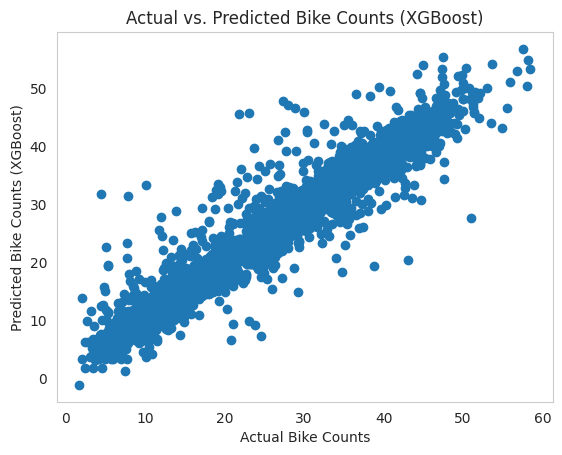

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Create and train the XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=500, random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_model.predict(x_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Model - Mean Squared Error:", xgb_mse)
print("XGBoost Model - R-squared:", xgb_r2)

# Visualize the predicted vs. actual values for XGBoost
plt.scatter(y_test, xgb_predictions)
plt.xlabel("Actual Bike Counts")
plt.ylabel("Predicted Bike Counts (XGBoost)")
plt.title("Actual vs. Predicted Bike Counts (XGBoost)")
plt.show()





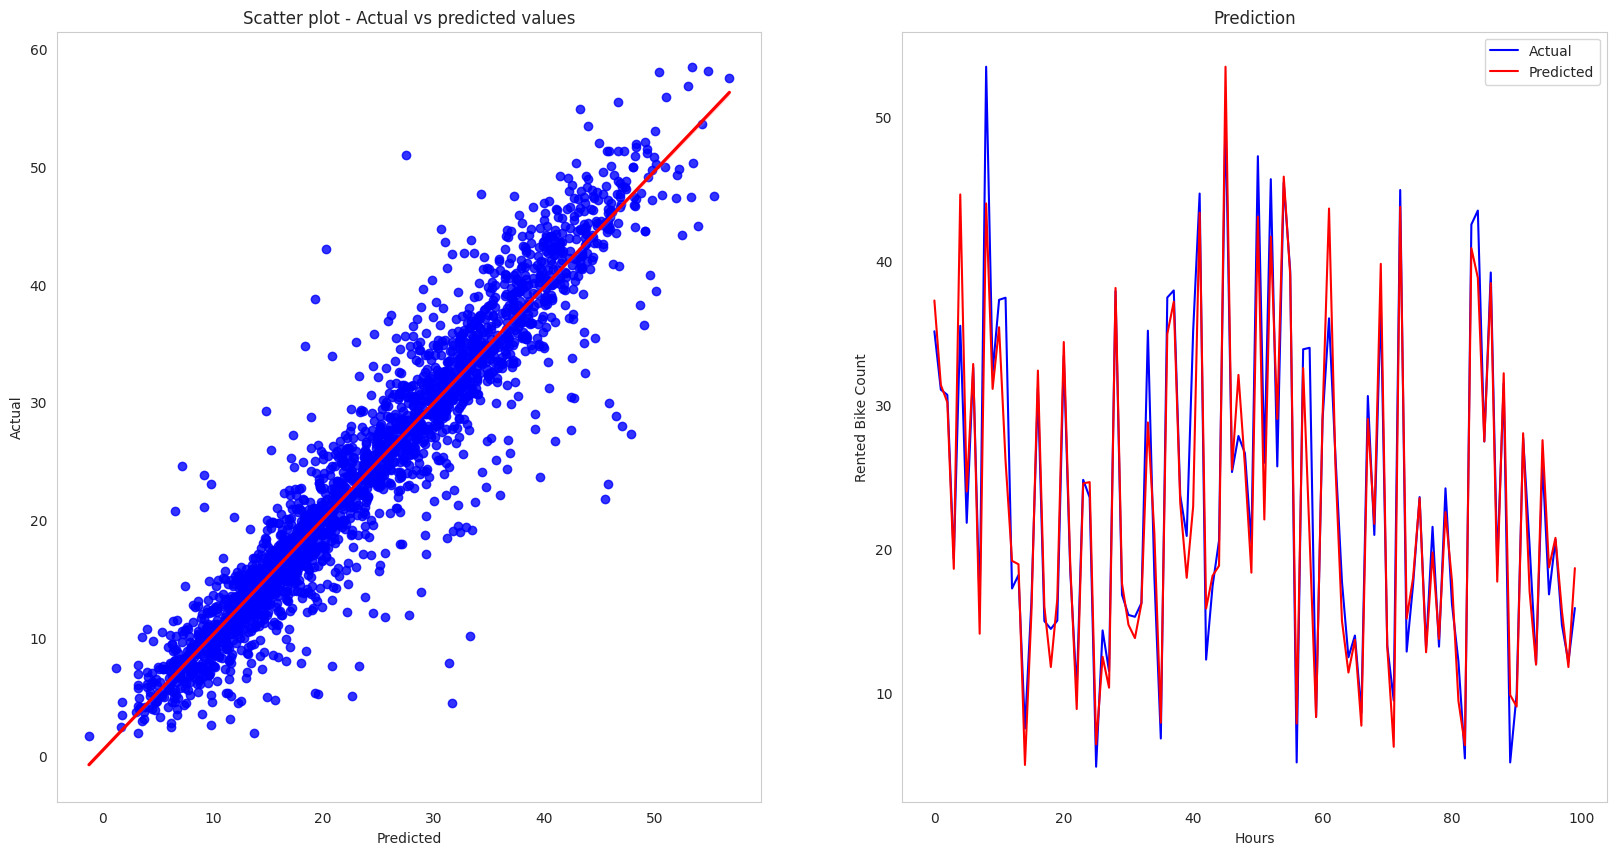

In [95]:
plot(y_test, xgb_predictions)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 5925, number of used features: 16
[LightGBM] [Info] Start training from score 24.313326
R2 Score: 0.9074037489878897
Mean Squared Error: 12.767377207919685


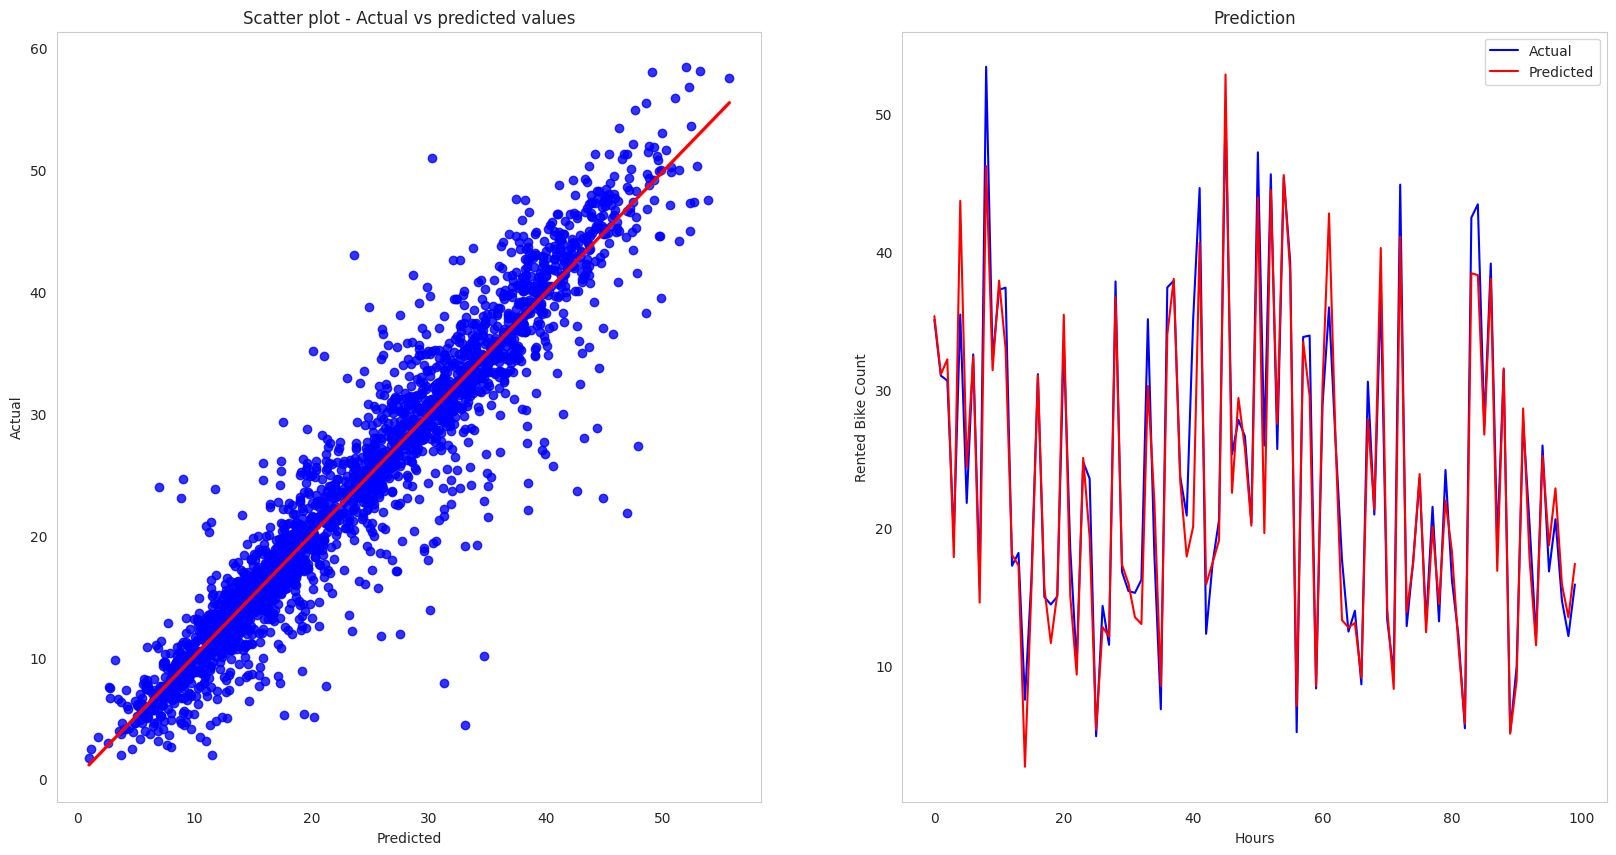

In [96]:
# Create and train the LightGBM Regressor model
lgbm_model = LGBMRegressor(n_estimators=500, random_state=42)
lgbm_model.fit(x_train, y_train)

# Make predictions and evaluate the model
lgbm_predictions = lgbm_model.predict(x_test)
lgbm_mse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

# Visualize the predicted vs. actual values for LightGBM
r2, mse = evaluate_performance(y_test, lgbm_predictions)
plot(y_test, lgbm_predictions)

# **Model Comparison**

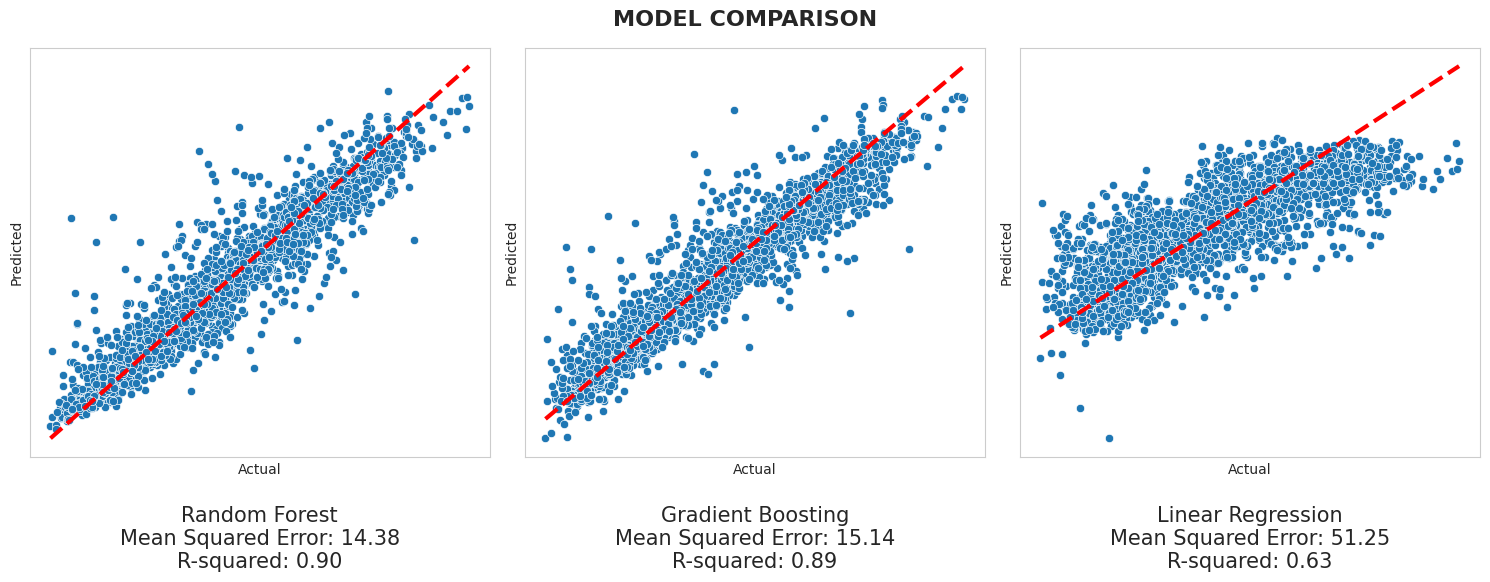

In [97]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
# Modeling

models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
}

# Hyperparameter tuning using GridSearchCV
param_grid = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]},
    "Linear Regression": {},
}

# Assuming y_train and y_test are continuous target variables
# Also assuming X_train and X_test are your feature matrices

best_models = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(x_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Evaluate and compare models
results = {}

for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"Mean Squared Error": mse, "R-squared": r2}

# Visualize results
fig, axes = plt.subplots(nrows=1, ncols=len(results), figsize=(15, 6))
fig.suptitle("MODEL COMPARISON", fontsize=16, fontweight='bold')
temp = pd.DataFrame(columns=["Actual", "Predicted"])
for i, (model_name, result) in enumerate(results.items()):
    temp["Actual"] = y_test.values.ravel()
    temp["Predicted"] = best_models[model_name].predict(x_test)
    sns.scatterplot(temp, x= "Actual", y="Predicted", ax=axes[i])
    axes[i].set_xticks([])  # Remove x-axis ticks
    axes[i].set_yticks([])  # Remove y-axis ticks
    axes[i].plot([min(temp["Actual"]), max(temp["Actual"])], [min(temp["Actual"]), max(temp["Actual"])], linestyle='--', color='red',linewidth = 3)
    axes[i].text(0.5, -0.2, f"{model_name}\nMean Squared Error: {result['Mean Squared Error']:.2f}\nR-squared: {result['R-squared']:.2f}",
                 ha='center', va='center', transform=axes[i].transAxes, fontsize=15)

plt.tight_layout()
plt.show()
